Import libraries:

In [2]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
## nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec


# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [3]:
train=pd.read_csv("C:\\Users\\Fakhruddin\\NLP hackathon\\file (4)\\data\\train.csv")
test=pd.read_csv("C:\\Users\\Fakhruddin\\NLP hackathon\\file (4)\\data\\test.csv")

In [4]:
train.shape

(7274, 3)

In [4]:
#decode_map = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE",3:"Can't Tell"}
#def decode_sentiment(label):
 #   return decode_map[int(label)]

In [5]:
#train.sentiment = train.sentiment.apply(lambda x: decode_sentiment(x))

In [6]:
#target_cnt = Counter(train.sentiment)

#plt.figure(figsize=(16,8))
#plt.bar(target_cnt.keys(), target_cnt.values())
#plt.title("Dataset sentiment distribuition")

In [5]:
train.isna().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [6]:
train.dropna(inplace=True)

In [7]:
train.isna().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [10]:
print(len(train[train.sentiment ==  0]), 'Negative Tweets')
print(len(train[train.sentiment == 1]), 'Neutral Tweets')
print(len(train[train.sentiment == 2]), 'positive Tweets')
print(len(train[train.sentiment == 3]), "Can't  Tell")

456 Negative Tweets
4310 Neutral Tweets
2382 positive Tweets
125 Can't  Tell


In [9]:
train[train.sentiment ==  0] ##negative
train[train.sentiment ==  1]##neutral
train[train.sentiment ==  2]##positive
train[train.sentiment ==  3]##cant tell

,tweet_id,tweet,sentiment
10,6398,RT @mention Official #SXSW App Û÷SXSW GOÛª b...,3
28,5368,standing on a long line surrounded by unemploy...,3
123,4618,Google/Bing search smackdown panel is in a gia...,3
133,7469,Original products for 1 device is nuts. #sxsw....,3
242,2116,iPhone crashed in front of #sxsw Apple pop-up....,3
265,3298,&quot;Google products need to be condensed&quo...,3
320,3855,"@mention is biyt.ly for email, like google voi...",3
340,9020,It's funny watching a room full of people hold...,3
354,3894,the panelist from Texas Observer called the iP...,3
384,2263,Any blackberry apps for #sxsw ?? Pls let @ment...,3


In [1]:
##importing different libraries for analysis, processing and classification
import nltk
from sklearn import re #regular expression for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 
# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria

In [12]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [13]:
train['normalized_text'] = train.tweet.apply(normalizer)

In [14]:
train.head()

,tweet_id,tweet,sentiment,normalized_text
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language touch dif...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny a...
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr rt quot sxsw appl...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone sxsw app would b pretty awesome crash e...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...


In [15]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [16]:
train['hashtag'] = train.tweet.apply(extract_hashtag)

In [17]:
train.head()

,tweet_id,tweet,sentiment,normalized_text,hashtag
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language touch dif...,sxswnui sxsw apple
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny a...,googledoodle sxsw
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr rt quot sxsw appl...,sxsw
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone sxsw app would b pretty awesome crash e...,sxsw fuckit illmakeitwork
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...,sxsw


In [18]:
# all tweets 
all_words = " ".join(train.normalized_text)
#print(all_all_words)

In [19]:
#Hatred tweets
hatred_words = " ".join(train[train['sentiment']==0].normalized_text)
print(hatred_words)

iphone sxsw app would b pretty awesome crash every min extended browsing fuckit illmakeitwork mention g iphone hr tweeting rise austin dead need upgrade plugin station sxsw went whole day w laptop amp used ipad thing missed ftp cloudapp fast typing amp skype ipad sxsw rt google lost way caring much business v user psych sxsw composed tweet acerbic cynical ipad user phone crashed dumped apps twitterpower sxsw imthatgood talk mistake made building netflix iphone sxsw netflixiphone spent come sxsw already used ipad wait couple city block ipad sxsw link tweeting sxsw pretty non existent today thanks iphone app fail hootsuite epic replacement owllove sitting floor behind guy fondling new ipad disturbing way sxsw quot reason apple continued survival existence god quot enchantment sxsw sxswi novelty ipad news apps fade fast among sxsw delegate link rt yet walk conference room look like apple ad think nothing else sxsw disgusted iphone battery life already pm blackberry going strong sxsw hey a

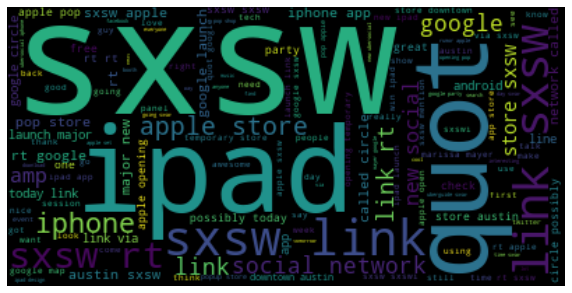

In [20]:
wordcloud = WordCloud(height=200, width=400, stopwords=STOPWORDS, background_color='black')
wordcloud = wordcloud.generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


hate tweet word cloud:

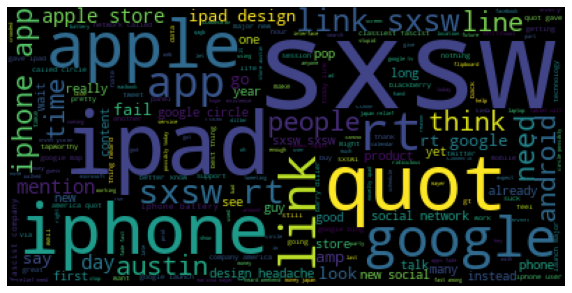

In [21]:
wordcloud = WordCloud(height=200, width=400, stopwords=STOPWORDS, background_color='black')
wordcloud = wordcloud.generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud,interpolation="kaiser")
plt.axis('off')
plt.show()

In [22]:
freq_all_hashtag = FreqDist(list((" ".join(train.hashtag)).split())).most_common(10)
freq_all_hashtag

[('sxsw', 7284),
 ('ipad', 447),
 ('apple', 341),
 ('google', 256),
 ('sxswi', 248),
 ('iphone', 216),
 ('android', 104),
 ('austin', 95),
 ('circles', 93),
 ('tech', 83)]

In [23]:
freq_hatred_hashtag = FreqDist(list((" ".join(train[train['sentiment']==0]['hashtag'])).split())).most_common(10)
freq_hatred_hashtag

[('sxsw', 455),
 ('ipad', 21),
 ('iphone', 13),
 ('apple', 12),
 ('google', 11),
 ('fail', 10),
 ('tapworthy', 10),
 ('sxswi', 8),
 ('circles', 8),
 ('japan', 7)]

In [24]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])
print(df_allhashtag.head())
print(df_allhashtag.head())

    words  frequency
0    sxsw       7284
1    ipad        447
2   apple        341
3  google        256
4   sxswi        248
    words  frequency
0    sxsw       7284
1    ipad        447
2   apple        341
3  google        256
4   sxswi        248


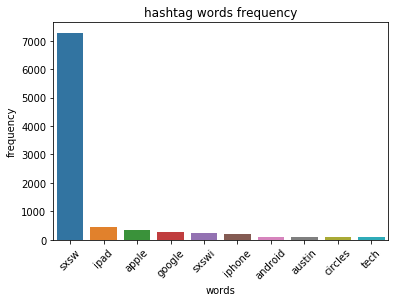

In [25]:
import seaborn as sns
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

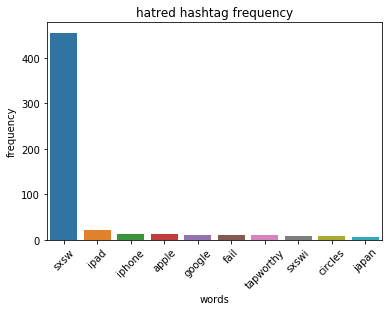

In [26]:
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

In [27]:
# to create sparse matrix corpus is created to pass to vectorizer
#len(train)
#corpus = []
#for i in range(0,7273):
 #   corpus.append(train['normalized_text'][i])
#corpus

In [28]:
corpus=train['normalized_text']

In [29]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [30]:
# creating dense matrix
X = cv.transform(corpus).toarray()
y = train.sentiment

In [31]:
y

0       1
1       1
2       2
3       0
4       1
5       1
6       1
7       1
8       2
9       2
10      3
11      2
12      2
13      1
14      1
15      1
16      1
17      2
18      1
19      1
20      1
21      1
22      2
23      2
24      0
25      1
26      1
27      1
28      3
29      1
       ..
7244    1
7245    2
7246    1
7247    1
7248    1
7249    1
7250    1
7251    1
7252    2
7253    1
7254    1
7255    2
7256    0
7257    1
7258    2
7259    2
7260    2
7261    2
7262    1
7263    2
7264    1
7265    2
7266    2
7267    3
7268    2
7269    1
7270    1
7271    1
7272    1
7273    1
Name: sentiment, Length: 7273, dtype: int64

In [32]:

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
classifier1 = LogisticRegression(C=10)
classifier1.fit(X_train, y_train)

C:\Users\Fakhruddin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)

In [35]:
f1_lr=f1_score(y_test,y_prob,average='weighted')

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets